# Fold network and load data in the neurons


While there are whole organism based datasets are increasingly becoming common for C elegans, several datasets are not currently available for every individual worm neuron, but a subset. Even for whole organism level datasets, data can often be found organized by neuron classes.
For example, datasets can be found with neuron class based on left/right position (AWCL and AWCR into AWC), or by dorsal and ventral position (RMEDL/RMEVL), or by lineage/function (e.g. amphids or ventral cord neurons (VC)) or by some combination of these. Here we show by taking the example of the CENGEN dataset how the network can be folded across these axes, preserving the data and combining the connections across the axis of folding.

In [1]:
from cedne import utils
import pandas as pd

/Users/sahilmoza/Library/Caches/pypoetry/virtualenvs/cedne-OqN2BZQP-py3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
w = utils.makeWorm()
w.stage='L4'
w.sex='Hermaphrodite'
w.genotype='N2'
nn = w.networks['Neutral']

## Loading CENGEN data into a dataframe (Using threshold 4 data)

In [3]:
transcripts = pd.read_csv(utils.thres_4,encoding= 'unicode_escape', index_col=1).drop(['Wormbase_ID','Unnamed: 0'], axis = 'columns')

## Creating the folding dictionary

The folding dictionary has the class name as the key and a list of neuron names that belong to that class as the values.
All the neurons in the values of this dictionary will be folded together into a single "class neuron" with its connections and 
attributes being the union of the connections and attributes of its member neurons. 
**Note that AWC_OFF has been mapped to AWCL and AWC_ON to AWCR for the graph.**

In [4]:
suffixes = ['', 'D', 'V', 'L', 'R', 'DL', 'DR', 'VL', 'VR', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']
neuron_class = {}
for n in transcripts.columns:
    neuron_class[n] = []
    for s in suffixes:
        if (n+s) in nn.neurons:
            neuron_class[n].append(n+s)
    if n == 'AWC_OFF':
        neuron_class[n].append('AWCL')
    if n == 'AWC_ON':
        neuron_class[n].append('AWCR')
    if n == 'VD_DD':
        for m in nn.neurons:
            if m.startswith('VD') or m.startswith('DD'):
                neuron_class[n].append(m)
    if n == 'RME_LR':
        for m in nn.neurons:
            if m == 'RMEL' or m == 'RMER':
                neuron_class[n].append(m)
    if n == 'RME_DV':
        for m in nn.neurons:
            if m == 'RMED' or m == 'RMEV':
                neuron_class[n].append(m)
    if n == 'RMD_LR':
        for m in nn.neurons:
            if m == 'RMDL' or m == 'RMDR':
                neuron_class[n].append(m)
    if n == 'RMD_DV':
        for m in nn.neurons:
            if m.startswith('RMDD') or m.startswith('RMDV'):
                neuron_class[n].append(m)
    if n == 'IL2_LR':
        for m in nn.neurons:
            if m == 'IL2L' or m == 'IL2R':
                neuron_class[n].append(m)
    if n == 'IL2_DV':
        for m in nn.neurons:
            if m.startswith('IL2D') or m.startswith('IL2V'):
                neuron_class[n].append(m)

for p in ['DA09']:
    neuron_class['DA'].remove(p)
for p in ['VB01', 'VB02']:
    neuron_class['VB'].remove(p)
for p in ['VC04', 'VC05']:
    neuron_class['VC'].remove(p)
for p in ['DB01']:
    neuron_class['DB'].remove(p) 
for p in ['VA12']:
    neuron_class['VA'].remove(p)

neuron_class['VC_4_5'] = ['VC04', 'VC05']
neuron_class['DA9'] = ['DA09']

In [5]:
neuron_class

{'ADA': ['ADAL', 'ADAR'],
 'ADE': ['ADEL', 'ADER'],
 'ADF': ['ADFL', 'ADFR'],
 'ADL': ['ADLL', 'ADLR'],
 'AFD': ['AFDL', 'AFDR'],
 'AIA': ['AIAL', 'AIAR'],
 'AIB': ['AIBL', 'AIBR'],
 'AIM': ['AIML', 'AIMR'],
 'AIN': ['AINL', 'AINR'],
 'AIY': ['AIYL', 'AIYR'],
 'AIZ': ['AIZL', 'AIZR'],
 'ALA': ['ALA'],
 'ALM': ['ALML', 'ALMR'],
 'ALN': ['ALNL', 'ALNR'],
 'AQR': ['AQR'],
 'AS': ['AS01',
  'AS02',
  'AS03',
  'AS04',
  'AS05',
  'AS06',
  'AS07',
  'AS08',
  'AS09',
  'AS10',
  'AS11'],
 'ASEL': ['ASEL'],
 'ASER': ['ASER'],
 'ASG': ['ASGL', 'ASGR'],
 'ASH': ['ASHL', 'ASHR'],
 'ASI': ['ASIL', 'ASIR'],
 'ASJ': ['ASJL', 'ASJR'],
 'ASK': ['ASKL', 'ASKR'],
 'AUA': ['AUAL', 'AUAR'],
 'AVA': ['AVAL', 'AVAR'],
 'AVB': ['AVBL', 'AVBR'],
 'AVD': ['AVDL', 'AVDR'],
 'AVE': ['AVEL', 'AVER'],
 'AVF': ['AVFL', 'AVFR'],
 'AVG': ['AVG'],
 'AVH': ['AVHL', 'AVHR'],
 'AVJ': ['AVJL', 'AVJR'],
 'AVK': ['AVKL', 'AVKR'],
 'AVL': ['AVL'],
 'AVM': ['AVM'],
 'AWA': ['AWAL', 'AWAR'],
 'AWB': ['AWBL', 'AWBR'],
 'AWC_

## Folding the network

In [6]:
list(nn.neurons)

['ASJL',
 'ASJR',
 'ASKL',
 'ASKR',
 'ASGL',
 'ASGR',
 'ASIL',
 'ASIR',
 'AFDL',
 'AFDR',
 'AWAL',
 'AWAR',
 'AWBL',
 'AWBR',
 'AWCL',
 'AWCR',
 'ASEL',
 'ASER',
 'ADFL',
 'ADFR',
 'ASHL',
 'ASHR',
 'ADLL',
 'ADLR',
 'BAGL',
 'BAGR',
 'URXL',
 'URXR',
 'ALNL',
 'ALNR',
 'PLNL',
 'PLNR',
 'SDQL',
 'SDQR',
 'AQR',
 'PQR',
 'ADEL',
 'ADER',
 'PDEL',
 'PDER',
 'ALML',
 'ALMR',
 'AVM',
 'PVM',
 'PLML',
 'PLMR',
 'FLPL',
 'FLPR',
 'DVA',
 'PVDL',
 'PVDR',
 'PHAL',
 'PHAR',
 'PHBL',
 'PHBR',
 'PHCL',
 'PHCR',
 'IL2DL',
 'IL2DR',
 'IL2L',
 'IL2R',
 'IL2VL',
 'IL2VR',
 'CEPDL',
 'CEPDR',
 'CEPVL',
 'CEPVR',
 'OLQDL',
 'OLQDR',
 'OLQVL',
 'OLQVR',
 'URYDL',
 'URYDR',
 'URYVL',
 'URYVR',
 'OLLL',
 'OLLR',
 'IL1DL',
 'IL1DR',
 'IL1L',
 'IL1R',
 'IL1VL',
 'IL1VR',
 'AIML',
 'AIMR',
 'AINL',
 'AINR',
 'RIH',
 'URBL',
 'URBR',
 'RIR',
 'PVQL',
 'PVQR',
 'ALA',
 'BDUL',
 'BDUR',
 'AIYL',
 'AIYR',
 'AIAL',
 'AIAR',
 'AUAL',
 'AUAR',
 'AIZL',
 'AIZR',
 'RIS',
 'ADAL',
 'ADAR',
 'RIFL',
 'RIFR',
 'PVR',


In [7]:
nn.fold_network(neuron_class)

## Loading cengen transcripts into the network

In [8]:
for n in nn.neurons:
    nn.neurons[n].set_property('transcript', transcripts[n])

In [11]:
## Giving the sex specific neurons an interneuron type for positioning on graph.
sex_neurons = ['CAN']
for n in nn.neurons:
    if n in sex_neurons:
        nn.neurons[n].type = 'interneuron'

## Plotting the network with the CENGEN transcript data

{'sensory': {'SN1': [(-1.535, 0.024459134615384615), 0.5315384615384615, 0.025], 'SN2': [(-0.9965384615384616, 0.024459134615384615), 0.22384615384615386, 0.025], 'SN3': [(-0.7657692307692309, 0.024459134615384615), 0.6853846153846155, 0.025], 'SN4': [(-0.07346153846153847, 0.024459134615384615), 0.5315384615384615, 0.025], 'SN5': [(0.46499999999999997, 0.024459134615384615), 0.146923076923077, 0.025], 'SN6': [(0.6188461538461538, 0.024459134615384615), 0.9161538461538461, 0.025]}, 'interneuron': {'layer 1 interneuron': [(-2.035, -0.014002403846153847), 0.5315384615384615, 0.025], 'layer 2 interneuron': [(-1.4965384615384616, -0.014002403846153847), 1.07, 0.025], 'layer 3 interneuron': [(-0.4196153846153846, -0.014002403846153847), 1.3776923076923078, 0.025], 'category 4 interneuron': [(0.965, -0.014002403846153847), 0.3776923076923077, 0.025], 'linker to pharynx': [(1.3496153846153847, -0.014002403846153847), 0.07, 0.025], 'pharynx': [(1.4265384615384618, -0.014002403846153847), 0.531

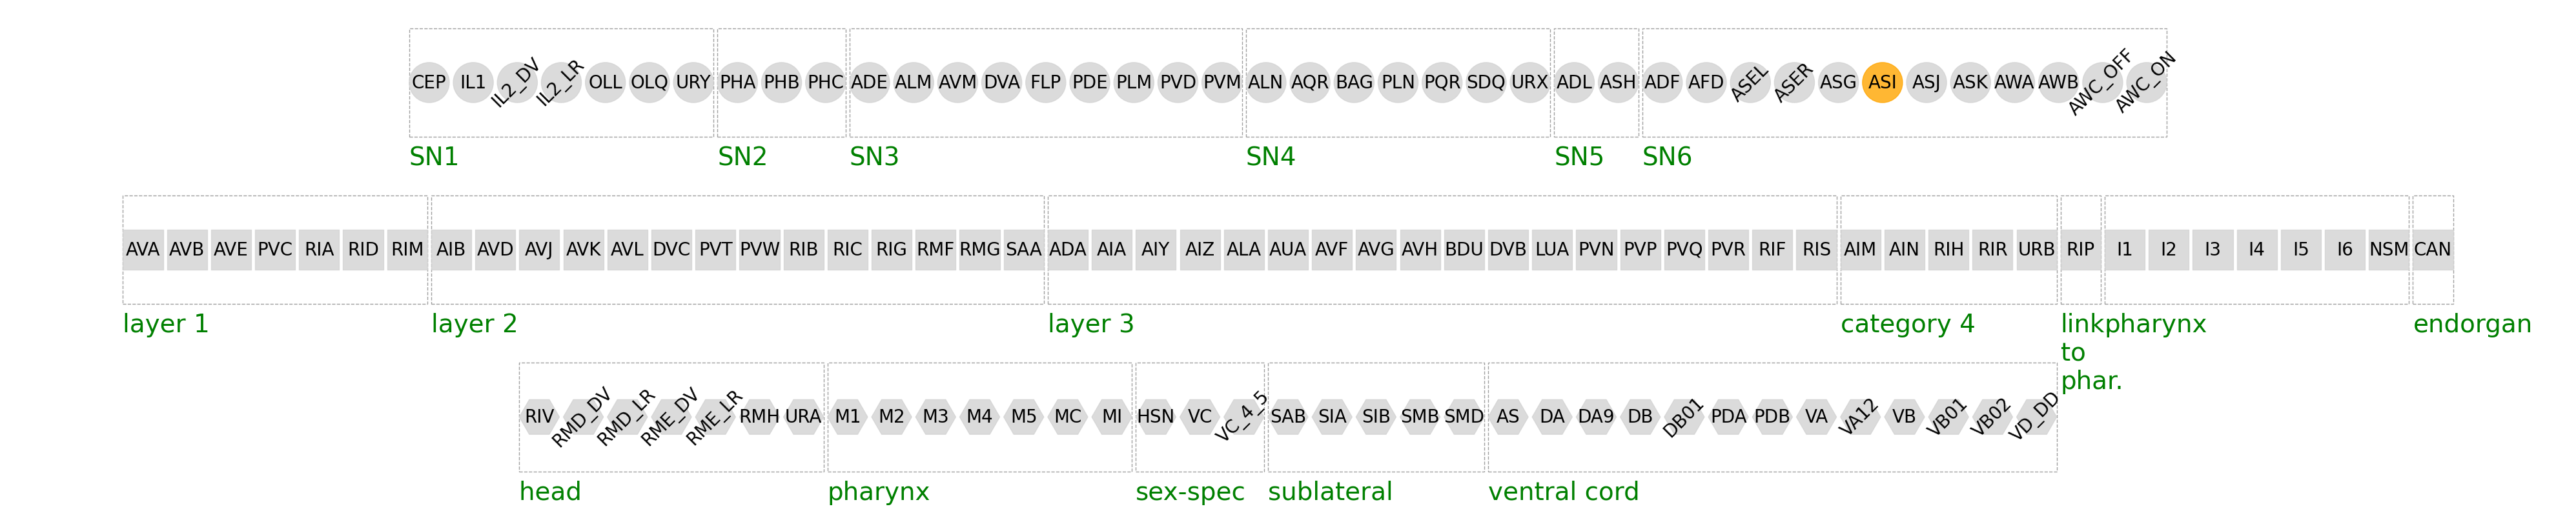

In [12]:
transcript_name = 'gpa-4'
save = False #outputDir + nprc + '.pdf'
conns = [(e[0].name, e[1].name) for e in nn.edges]
connNodes = list(nn.neurons.keys())
nodeColors = {n:('orange' if nn.neurons[n].transcript[transcript_name]>0 else 'lightgray') for n in connNodes}

pos = utils.plot_layered(conns, neunet=nn, nodeColors=nodeColors, title= '', save= save)

ASI looks interesting...

## Plotting the subnetwork of the neuron 'ASI'

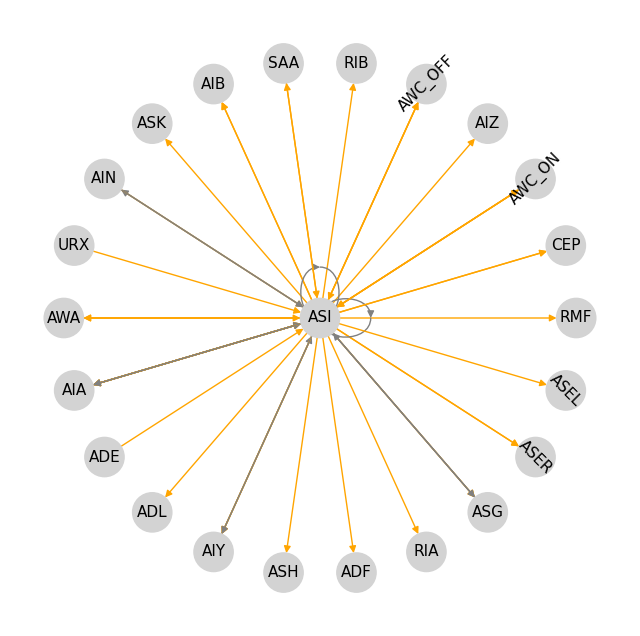

In [13]:
conns = nn.neurons['ASI'].get_connections()
g = nn.subnetwork(connections=conns)
utils.plot_shell(g, center='ASI')